In [1]:
#Import all necessary libraries 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
#Load all datasets into the notebook

In [4]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv('test_data.csv')

In [5]:
var = pd.read_csv("VariableDescription.csv")
var

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [6]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [7]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [10]:
#Check for total null values in each columns 

In [11]:
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [12]:
test.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [13]:
#drop columns Date_of_Occupancy and Geo_Code and number of windows  

In [14]:
train.drop(["Date_of_Occupancy", "Geo_Code"], 1, inplace = True)
test.drop(["Date_of_Occupancy", "Geo_Code"], 1, inplace = True )

In [15]:
train["NumberOfWindows"].value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

In [16]:
train["NumberOfWindows"]=train.NumberOfWindows.replace("   .",np.NaN, method = None )
test["NumberOfWindows"]=test.NumberOfWindows.replace("   .",np.NaN, method = None )

In [17]:
train["NumberOfWindows"]= train["NumberOfWindows"].str.replace(">=", "")
test["NumberOfWindows"]= test["NumberOfWindows"].str.replace(">=", "")

In [18]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,NaN,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,4,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,NaN,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,NaN,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,3,0


In [21]:
train["NumberOfWindows"] = train["NumberOfWindows"].astype("float")
test["NumberOfWindows"] = test["NumberOfWindows"].astype("float")

In [27]:
#Fill the missing values of Number of windows and building dimension with mean

In [23]:
train["NumberOfWindows"].fillna(train["NumberOfWindows"].mean(), inplace = True)
test["NumberOfWindows"].fillna(test["NumberOfWindows"].mean(), inplace = True)

In [24]:
train["Building Dimension"].fillna(train["Building Dimension"].mean(), inplace = True)
test["Building Dimension"].fillna(test["Building Dimension"].mean(), inplace = True)

In [25]:
#Data visualization 

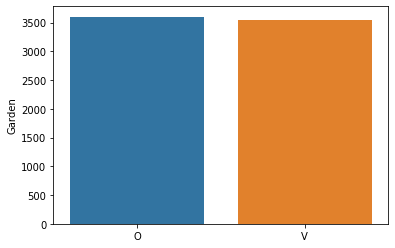

In [26]:
sns.barplot(x =train["Garden"].value_counts().index, y=train["Garden"].value_counts())

From the above it shows that most of the house does not have a garden and would be filling the missing values with V

In [28]:
train["Garden"].fillna("V", inplace = True)
test["Garden"].fillna("V", inplace = True)

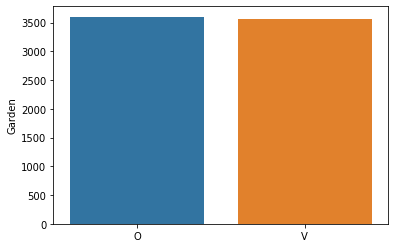

In [29]:
sns.barplot(x =train["Garden"].value_counts().index, y=train["Garden"].value_counts())

Checking again for the missidng values

In [30]:
train.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Claim                 0
dtype: int64

In [31]:
test.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
dtype: int64

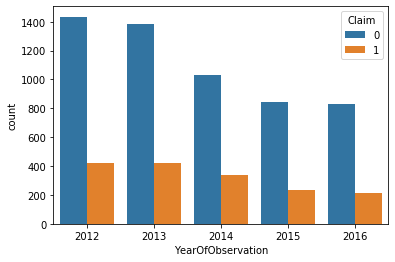

In [32]:
sns.countplot(x = "YearOfObservation", data = train, hue = "Claim")

It shows that the conversion rate of persons who later purchase a house after first observation is very low.

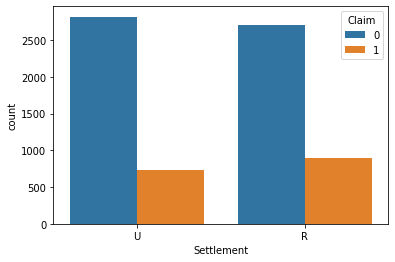

In [33]:
sns.countplot(train["Settlement"], data = train, hue = "Claim")

It shows that most person who finally purchase prefer rural areas.

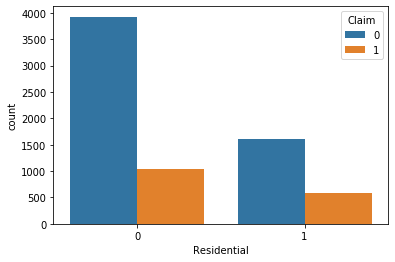

In [34]:
sns.countplot(train["Residential"],data= train, hue = "Claim")

it shows that most person prefer houses that are not residental houses 

In [ ]:
#Checking for outliers 

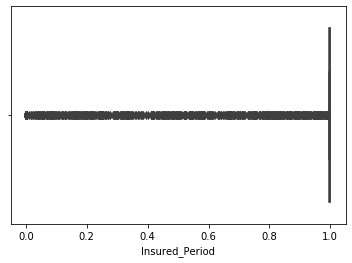

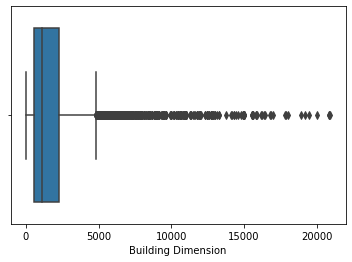

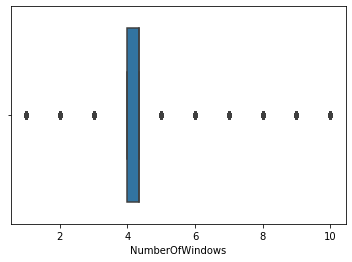

In [45]:
df1 = train.select_dtypes(["int", "float"])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.boxplot(x=col, data=df1)

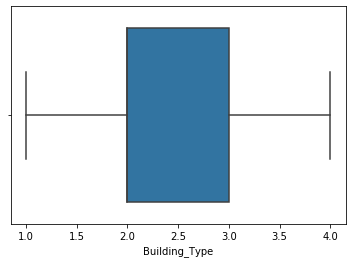

In [46]:
sns.boxplot( x= train["Building_Type"], data =train)

In [68]:
df = pd.concat([train, test])

In [69]:
df["Insured_Period"].describe()

count    10229.000000
mean         0.913672
std          0.233806
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Insured_Period, dtype: float64

In [70]:
df["Building Dimension"].describe()

count    10229.000000
mean      1818.640082
std       2258.871171
min          1.000000
25%        510.000000
50%       1030.000000
75%       2167.000000
max      30745.000000
Name: Building Dimension, dtype: float64

In [71]:
df["NumberOfWindows"].describe()

count    10229.000000
mean         4.326116
std          1.185629
min          1.000000
25%          4.000000
50%          4.332502
75%          4.332502
max         10.000000
Name: NumberOfWindows, dtype: float64

In [72]:
#Using the 75th pencitile to remove outliers 

In [73]:
for col in ["NumberOfWindows", "Building Dimension"]:
    q3 = df[col].quantile(0.75)  
    q1 = df[col].quantile(0.25)
    IQR = q3 - q1
    lower_limit = q1 -  IQR * 1.5
    upper_limit = q3 +  IQR * 1.5
    df[col] = np.where(df[col]> upper_limit, upper_limit,
                        np.where(df[col]< lower_limit, lower_limit,
                          df[col]))

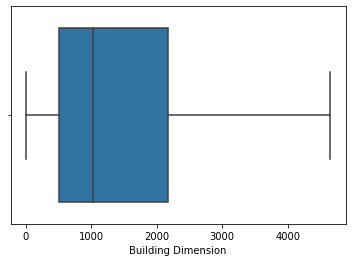

In [74]:
sns.boxplot( x= df["Building Dimension"], data =df)

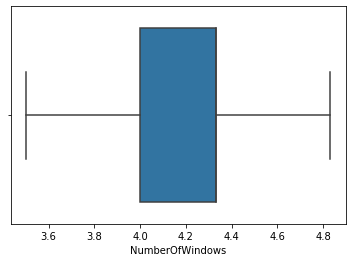

In [75]:
sns.boxplot( x= df["NumberOfWindows"], data =df)

In [77]:
#Converting categorical columns to numerical 

In [78]:
cols = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']
for col in cols: 
    df[col] = pd.get_dummies(df[col], prefix=col)

In [79]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
0,H14663,2013,1.0,0,1,0,0,0,290.0,1,4.332502,0.0
1,H2037,2015,1.0,0,0,1,1,1,490.0,1,4.000000,0.0
2,H3802,2014,1.0,0,1,0,0,0,595.0,1,4.332502,0.0
3,H3834,2013,1.0,0,0,0,0,0,2840.0,1,4.332502,0.0
4,H5053,2014,1.0,0,0,1,1,1,680.0,1,3.501247,0.0


In [80]:
#Drop customers id and year of observation because i don't need it for the model

In [81]:
df.drop(["Customer Id", "YearOfObservation"], 1, inplace = True)

In [82]:
#spliting the dataset into training and test dataset 

In [83]:
train = df.iloc[:7160, :]

In [84]:
test = df.iloc[7160:, :]

In [85]:
test.drop("Claim", 1, inplace= True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [86]:
test.isnull().sum()

Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
dtype: int64

In [87]:
X = train.drop("Claim",1 )
y = train["Claim"]

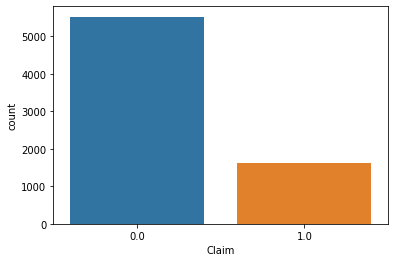

In [88]:
sns.countplot(train["Claim"])

it shows it is unbalance so would use randomundersampler so as to reduce biasing 

In [89]:
from imblearn.under_sampling import RandomUnderSampler

In [90]:
less = RandomUnderSampler(sampling_strategy = "majority")

In [91]:
X_resampled, y_resampled = less.fit_resample(X,y)

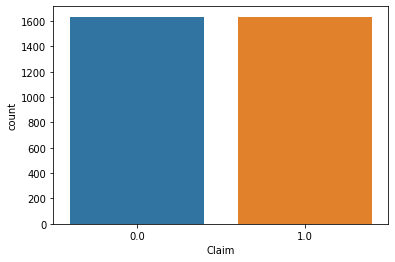

In [92]:
sns.countplot(y_resampled)

In [93]:
from sklearn.model_selection import train_test_split, cross_validate

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [95]:
#To check the behaviour of our model would be using cross validation

In [96]:
log = LogisticRegression()
svb = SVC()
cv_results_1 = cross_validate(svb, X_resampled, y_resampled, cv = 5)
cv_results_2 = cross_validate(log, X_resampled, y_resampled, cv = 5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [97]:
print("the cross validation for SVC is ",cv_results_1["test_score"])
print("the cross validation for Logistic Regression is ",cv_results_2["test_score"])

the cross validation for SVC is  [0.62691131 0.64984709 0.65749235 0.60643185 0.64777948]
the cross validation for Logistic Regression is  [0.62385321 0.61009174 0.63302752 0.64777948 0.63859112]


In [98]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3)

In [99]:
svh = SVC()
svh.fit(x_train, y_train)

SVC()

In [100]:
svh.score(x_test, y_test)

0.6391437308868502

In [101]:
svh.score(x_train, y_train)

0.6423261915172715

In [102]:
from sklearn.metrics import confusion_matrix, classification_report

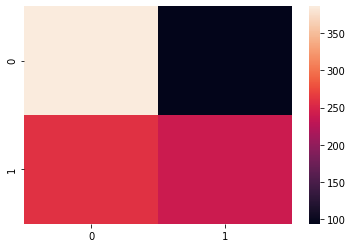

In [103]:
sns.heatmap(confusion_matrix(y_test, svh.predict(x_test)))

In [104]:
print(classification_report(y_test, svh.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.60      0.80      0.69       480
         1.0       0.72      0.48      0.58       501

    accuracy                           0.64       981
   macro avg       0.66      0.64      0.63       981
weighted avg       0.66      0.64      0.63       981

